In [131]:
path = 'C://Users//Mi//Documents//Projets Python//Kaggle//client segmentation//'

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Le but de ce Notebook est de catégoriser les clients d'un centre commercial en fonction du peu d'informations dont on dispose sur eux (Sexe, Age, Revenus annuels, un Score de dépense).
Mon but est de trouver des classes intéressantes d'un point de vue ciblage publicitaire. Mon objectif est de trouver des classes les plus homogènes possibles et leurs caractéristiques.

'Spending Score' est relatif aux achats du clients et a son comportement dans le centre commercial.

# Introduction

In [133]:
data = pd.read_csv(path+'Mall_Customers.csv')
df = pd.read_csv(path+'Mall_Customers.csv')
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [134]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])   #1=Male et 0=Female

In [136]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


# Premieres observations

In [137]:
df.isnull().sum(axis=0).reset_index()

,index,0
0,CustomerID,0
1,Gender,0
2,Age,0
3,Annual Income (k$),0
4,Spending Score (1-100),0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


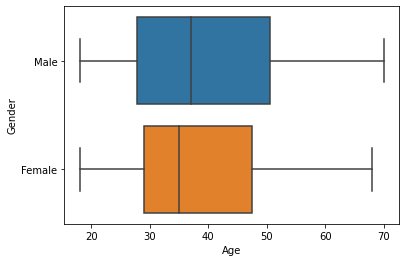

In [138]:
ax = sn.boxplot(data['Age'],data['Gender'])

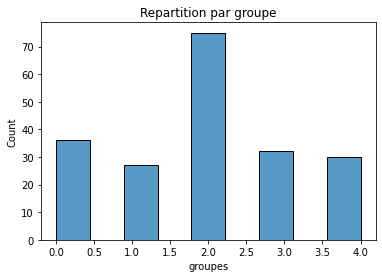

In [139]:
df['groupes'] = pd.cut(df[target], bins=[0, 20, 40, 60, 80, 100]).cat.codes
ax = sn.histplot( x='groupes', data=df).set(title='Repartition par groupe')

<AxesSubplot:>

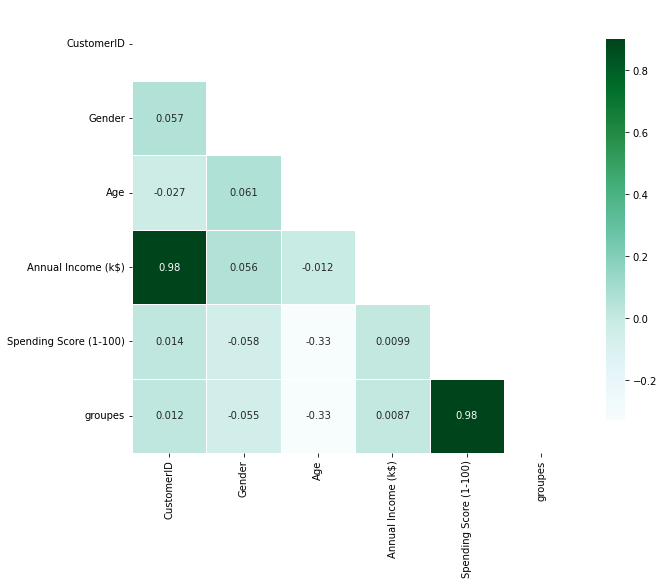

In [140]:
corr = df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10,10))
mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle
sn.heatmap(corr, mask=mask, vmax = 0.9, cmap='BuGn', square = True, annot = True, linewidths=.5, cbar_kws={"shrink": .7})

# Clustering kmeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


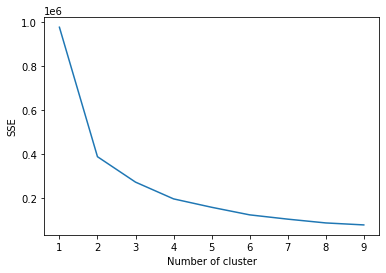

In [144]:
import random
random.seed(1)

from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, init='k-means++').fit(df)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

On considere 4 clusters distincts.

In [153]:
random.seed(1)
kmeans = KMeans(n_clusters=4, max_iter=1000, init='k-means++').fit(df)
df['clusters'] = kmeans.predict(df)

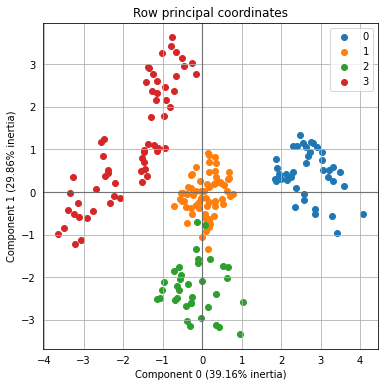

In [154]:
import prince

coll = clusters
pca = prince.PCA(n_components=2, random_state=0).fit(df)
ax = pca.plot_row_coordinates(df, ax=None, figsize=(6, 6), x_component=0, y_component=1, labels=None, color_labels=df['clusters'], ellipse_outline=False, ellipse_fill=False, show_points=True)


# Etude des groupes

## Etude des variables Age et Sexe

In [155]:
df.groupby(['clusters'])['Age','Gender'].describe(percentiles=[0.5])

C:\Users\Mi\AppData\Local\Temp/ipykernel_21676/177684011.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['clusters'])['Age','Gender'].describe(percentiles=[0.5])


Age                                         Gender            \
         count       mean        std   min   50%   max  count      mean   
clusters                                                                  
0         39.0  32.692308   3.728650  27.0  32.0  40.0   39.0  0.461538   
1         66.0  43.878788  17.170202  18.0  47.0  70.0   66.0  0.439394   
2         36.0  40.805556  11.305674  19.0  41.5  59.0   36.0  0.527778   
3         59.0  36.101695  13.731031  18.0  33.0  67.0   59.0  0.372881   

                                   
               std  min  50%  max  
clusters                           
0         0.505035  0.0  0.0  1.0  
1         0.500117  0.0  0.0  1.0  
2         0.506309  0.0  1.0  1.0  
3         0.487722  0.0  0.0  1.0

Pour l'age, on voit que le seul cluster qui sort du lot est le cluster 0. Il semble que ca soit une classe de jeunes adultes (entre 27 et 40 ans). Les autres clusters sont moins homogenes niveau age. Le cluster 3 semble quand meme un peu plus jeune en moyenne que les cluster 1 et 2. \
Pour les sexes, on voit que les groupes sont assez semblables. Le groupe 3 semble quand meme un peu plus represente par des individus de sexe feminin.

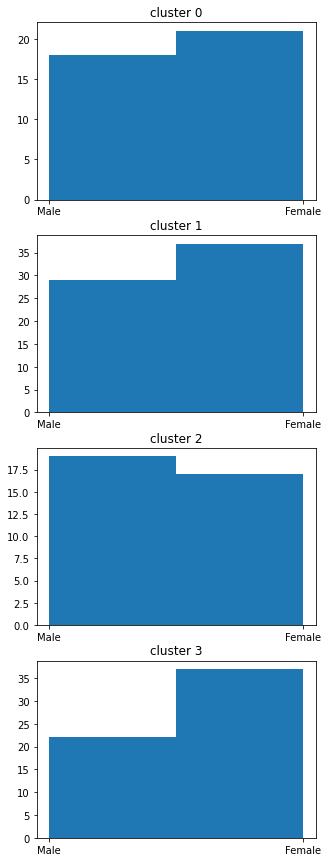

In [175]:
plt.figure(figsize=(5,15))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.hist(data[df['clusters']==i]['Gender'],align='mid',bins=2)
    plt.title("cluster "+str(i))
plt.show()

On a bien le cluster 3 qui a une difference de repartition entre les individus de sexe Feminin et de sexe Masculin.

## Etude des variables Depenses et Revenus

In [176]:
df.groupby(['clusters'])['Spending Score (1-100)','Annual Income (k$)'].describe(percentiles=[0.5])

C:\Users\Mi\AppData\Local\Temp/ipykernel_21676/171803365.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['clusters'])['Spending Score (1-100)','Annual Income (k$)'].describe(percentiles=[0.5])


Spending Score (1-100)                                          \
                          count       mean        std   min   50%   max   
clusters                                                                  
0                          39.0  82.128205   9.364489  63.0  83.0  97.0   
1                          66.0  49.257576   6.615391  29.0  49.0  60.0   
2                          36.0  17.888889  10.708549   1.0  16.0  40.0   
3                          59.0  49.864407  27.887371   3.0  51.0  99.0   

         Annual Income (k$)                                           
                      count       mean        std   min   50%    max  
clusters                                                              
0                      39.0  86.538462  16.312485  69.0  79.0  137.0  
1                      66.0  57.727273   6.929414  44.0  59.5   71.0  
2                      36.0  87.916667  16.231143  71.0  83.0  137.0  
3                      59.0  29.864407   9.685499  15.0  29.0   46.0

Le cluster 0 represente les individus de haut 'Spending Score' et ayant des revenus annuels eleves. \
Le cluster 1 represente les individus de 'Spending Score' moyens et de revenus annuels moyens. \
Le cluster 2 represente les individus de faible 'Spending Score' mais de revenus annuels eleves. \
Le cluster 3 represente les individus de 'Spending Score' moyens et ayant de faibles revenus annuels. 

In [177]:
avgSpending = df.groupby(['clusters'])['Spending Score (1-100)'].mean()
avgIncome = df.groupby(['clusters'])['Annual Income (k$)'].mean()
print('Les moyennes Depenses/Revenus par cluster: '+str(avgSpending/avgIncome))

Les moyennes Depenses/Revenus par cluster: clusters
0    0.949037
1    0.853281
2    0.203476
3    1.669694
dtype: float64


On peut donc cibler ces individus de manieres tres diverses. \
Les individus de la classe 2 sont tres interessants du point de vue marketing. En ciblant au mieux leurs envies, on peut augmenter leurs depenses. Le potentiel de ce cluster est tres eleve. \
Pour le cluster 3, on voit que les individus sont les plus depensiers (relativement a leurs revenus annuels). 

# Conclusion

La classe 0 semble representer les jeunes adultes a hauts revenus. Ils ont un fort pouvoir d'achat et depensent en consequence. \
La classe 1 rassemble les clients qui depensent a hauteur de leurs revenus moyens. \
La classe 2 represente les individus avec un fort pouvoir d'achat mais qui ont un faible Score de depense. C'est le cluster avec le plus gros potentiel de progression dans les ventes. \
La classe 3 rassemble surtout des femmes. Les individus de ce groupe ont les plus gros scores de depense compare a leurs revenus annuels. 